### KNN Classifier


1) KNN Stands for K Nearest Neighbors <br>
2) It is a supervised learning algorithm used for Regression and Classification<br>
2) <b>KNN Intuition</b> - The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.<br>
3) KNN Classification works by finding the distances between a query(test data) and all the examples in the data(train data), selecting the specified number of examples (K) closest to the query, and then takes mode of those classes.

### Steps in K-NN Classification Algorithm

1) Load the data<br>
2) Initialize K to your chosen number of neighbors.<br>
3) For getting the predicted class, iterate from 1 to total number of training data points 
<br>
a) Calculate the distance between test data and each row of training data. Here we will use
Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Manhattan, etc.
<br>
b) Sort the calculated distances in ascending order based on distance values<br>
c) Get top K rows from the sorted array<br>
d) Get the most frequent class(mode) of these rows<br>
e) Return the predicted class


#### Distance Metrics

For 2 data points A(x1,y1) and B(x2,y2)

1) <b>Eculidean Distance</b><br>
$ d(A,B) =  ((x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2})^{(1/2)} $

2) <b>Manhattan Distance</b><br>
$ d(A,B) =  |x_{2} - x_{1}| + |y_{2} - y_{1}| $

3) <b>Minkowski Distance</b><br>
$ d(A,B) =  ((|x_{2} - x_{1}|)^{p} + (|y_{2} - y_{1}|)^{p})^{(1/p)} $

where p is an integer

#### Note
a) For p=2, Minkowski’s Distance equals Euclidean’s Distance <br>
b) For p=1, Minkowski’s Distance equals Manhattan Distance 

#### How to determine the optimum value of K

Optimium value of K can be determined by Cross validation techniques

<img src="knn1.png">

### Notes
1) As we decrease the value of K to 1, our predictions become less stable.<br>
2) Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, model is more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors if we increase K too much. It is at this point we know we have pushed the value of K too far.<br>
3) In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.<br>
4) Since model compute distance in KNN, it is necessary to Scale/Standardization the data before applying KNN so that the features are in the same range<br>

#### Importing Libraries

In [16]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt

In [18]:
df = pd.read_csv('Bankruptcy.csv')
print(type(df))
df.head()  # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [20]:
df.shape
# Number of ros=132, number of columns = 27

(132, 27)

#### Handling Null values

In [23]:
nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

#### Checking the datatypes

In [24]:
df.dtypes

NO       int64
D        int64
YR       int64
R1     float64
R2     float64
R3     float64
R4     float64
R5     float64
R6     float64
R7     float64
R8     float64
R9     float64
R10    float64
R11    float64
R12    float64
R13    float64
R14    float64
R15    float64
R16    float64
R17    float64
R18    float64
R19    float64
R20    float64
R21    float64
R22    float64
R23    float64
R24    float64
dtype: object

In [26]:
df['NO'].nunique()

132

In [27]:
df.drop('NO',axis=1,inplace=True)
df.columns

Index(['D', 'YR', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
       'R21', 'R22', 'R23', 'R24'],
      dtype='object')

In [29]:
# Target Variable
df['D'].value_counts()

1    66
0    66
Name: D, dtype: int64

In [30]:
df['YR'].value_counts()

70    24
73    22
75    20
78    12
74    12
72    10
77     8
76     8
71     8
81     4
82     2
80     2
Name: YR, dtype: int64

In [31]:
df.head()

,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


#### Selecting the independent and the dependent features

In [32]:
x = df.drop('D',axis=1)  # selecting all columns except D (targat variable)
y = df['D']              # selecting D column as Target variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(132, 25)
(132,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Standardizing the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
print(x_sc.shape)
print(type(x_sc))

(132, 25)
<class 'numpy.ndarray'>


In [35]:
x_sc[:4]

array([[ 1.30542394, -0.1196727 ,  0.15066031, -0.66719305, -0.59620237,
         2.53359525,  0.62321827,  0.32635106,  0.14893474, -0.67334703,
        -0.11300623, -2.45315051, -2.01365323,  0.64248763,  0.13171539,
        -0.11621189,  3.92191204,  0.65015462,  0.03694819, -0.46734292,
        -1.38092976, -0.25971905,  2.19485826,  0.40284528, -0.03306618],
       [ 0.97782706, -0.197203  ,  0.06981819,  0.20109762, -0.16977948,
        -0.13025725, -0.26999358, -0.41081839, -0.32301584, -0.19567129,
         0.11560408,  0.80513285,  0.09828273,  0.24173929,  0.38491584,
         0.00875731,  0.44953799,  0.73331394,  0.01854381, -0.45876045,
        -0.43593675, -0.37129287,  0.07676149,  0.08726322, -0.16144077],
       [-0.66015735, -0.42979387, -0.33439239, -0.54315153, -0.50144173,
         0.11191116,  0.4445759 ,  0.09598561, -0.37001507, -0.51127847,
        -0.10157572,  0.23014167,  0.39998787, -0.05882196, -0.29028536,
        -0.3661503 , -0.32210069, -0.43091644, -0

#### Splitting data into Training and Testing data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
print(132*0.30)

39.6


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_sc,y, test_size=0.30,random_state=35)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(92, 25)
(40, 25)
(92,)
(40,)


#### Creating Functions to Evaluate the Confusion Matrix, Classification Report and to generate Training and Testing Score

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score', accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

### KNN Classifier

#### Import the library

In [44]:
from sklearn.neighbors import KNeighborsClassifier

#### Building the Model

In [46]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

#### Generate Training and Testing Scores (Accuracy)

In [49]:
mscore(knn)

Training Score 0.8369565217391305
Testing Score 0.8


#### Generate the Predictions

In [52]:
ypred_knn = knn.predict(x_test)
print(ypred_knn.shape)
print(ypred_knn[:7])

(40,)
[1 1 1 0 0 0 1]


#### Evaluate the Model

In [53]:
cls_eval(y_test,ypred_knn)

[[17  4]
 [ 4 15]]
Accuracy Score 0.8
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.79      0.79      0.79        19

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



#### Checking the optimal value of K for KNN Classifier

In [58]:
def optimal_K():
    k = list(range(3,40,2)) # k= 3,5,7,9....,35,37,39
    acc = []
    for i in range(len(k)):
        knn_model = KNeighborsClassifier(n_neighbors=k[i])
        knn_model.fit(x_train,y_train)
        acc.append(knn_model.score(x_test,y_test))
    print('Accuracy\n',acc)
    plt.plot(k,acc,color='maroon',marker='o')
    plt.xlabel('Num of Nearest Nerighbors')
    plt.ylabel('Test accuarcy')
    plt.grid()
    plt.show()

Accuracy
 [0.75, 0.725, 0.725, 0.75, 0.775, 0.775, 0.8, 0.8, 0.8, 0.8, 0.825, 0.85, 0.8, 0.825, 0.8, 0.775, 0.8, 0.8, 0.825]


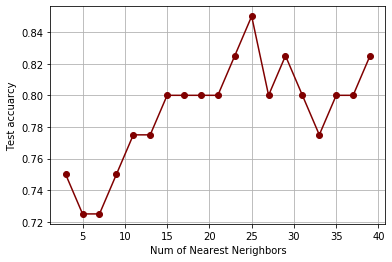

In [59]:
optimal_K()

#### Optimal value of K= 25